Open [README.ipynb](README.ipynb) to view the full README (unfortunately github does not render notebook readme's)

# Pyprojectx demo project

Make it easy for your co-developers/contributors/tutorial readers to get started with your python project.

If you have python 3.7+ and git installed, you're ready to go. No need to install jupyter, libraries, etc.

Clone the project and start experimenting:

```shell
git clone https://github.com/houbie/px-demo.git
./pw notebook
```

Pyprojectx(https://github.com/houbie/pyprojectx) can turn your [pyproject.toml](./pyproject.toml)
config file into an executable build script.


Things you can try out:
* show help: `./pw --help`
* show available tools and commands: `./pw --info`
* run a pdm command: `./pw pdm --help`
* use httpie to execute https commands: `./pw https --help`
* just type the first letters if you don't remember the full command: `./pw c`
* just type enough (camel case) letters to identify an aliased command:
  * `./pw post-json`  
  * `./pw pJ`
  * `./pw p`


## Python libraries
Make it a habit to manage the libraries that you use with a decent dependency manager like [Poetry](https://python-poetry.org/) or [PDM](https://pdm.fming.dev/).

So instead of using a _requirements.txt_, or worse, `pip install` instructions, list your dependencies in _pyproject.toml_.

No need to install anything, the pyprojectx wrapper script will make sure that the tools are available.
All the required tools are installed inside the project dir (cfg. npm dev dependencies).

Experimenting with your code in a Jupyter notebook f.e., becomes as easy as `./pw notebook`.

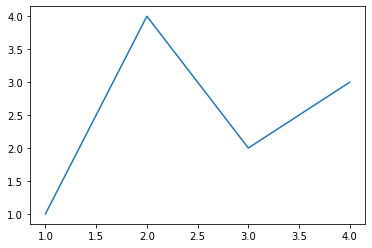

In [2]:
# the project and all required libraries are automatically available here
from px_demo import plot
plot.simple_plot()

## Lightweight
The _pw_ wrapper script installs all the (Python) tools that your project uses in isolated virtual environments inside 
_.pyprojectx_.

This is analogous to how npm stores everything in the _node_modules_ subdirectory of your project directory.

All commands and arguments are then forwarded to the resp. virtual environment by just typing _./pw_ in front.

## Simplified CI/CD pipelines
Run tests and build a distribution with `./pw build`. See it in action in this project's [github action workflow](.github/workflows/build.yml) or
the [pyprojectx workflow](https://github.com/houbie/pyprojectx/tree/main/.github/workflows) for a full example.

> **_NOTE:_**  If your CI/CD server runs on both linux and windows, you can merge the linux style `./pw build` and the windows style `pw build`
> into a single command: `python pw build`

## Getting started with pyprojectx in your own project
You only need to download the wrapper scripts into your project directory (or any empty directory)
* osx / linux :
```shell
curl -LO https://github.com/houbie/pyprojectx/releases/latest/download/wrappers.zip && unzip wrappers.zip && rm -f wrappers.zip
```
* windows: unpack the [wrappers zip](https://github.com/houbie/pyprojectx/releases/latest/download/wrappers.zip)

Then specify which tool(sets) you want to use in  _pyproject.toml_:
```toml
[tool.pyprojectx]
pdm = "pdm==1.12.6" # or with poetry instead: poetry = "poetry==1.1.12"
black = "black==21.7b0"
https = "httpie"
```

And optionally define aliases to save you a lot of typing:
```toml
[tool.pyprojectx.aliases]
install = "pdm install" # or with poetry instead "poetry install"
build ="pw@install && pw@pdm build" # reuse aliases
test = "pdm run pytest"
format-code = "black src tests"
post-json = "https POST pie.dev/post message='Pyprojectx is awesome!'"
clean ="rm -r __pypackages__ .pytest_cache dist"

[tool.pyprojectx.os.win.aliases]
# os specific aliases
clean = "rmdir /s/q __pypackages__ .pytest_cache dist"
